### Skeleton for HW5
Rename this file and place your code here.

**Note: If a cell begins with HW: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW. This also clearly delineates the sections for me.**

#### HW: For the preamble, leave any general comments here and load all needed modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg
import scipy
import seaborn as sns
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import time

**HW 4-1**: The differential steady state mass balance for a compound moving along a plug-flow reactor as a function of distance along the reactor while undergoing a first-order decomposition is:

\begin{equation*}
D\left(\frac{\partial^2 c}{\partial x^2}\right) - U \left( \frac{\partial c}{\partial x}\right) - kc = 0
\end{equation*}

where $C$ is the concentration, $x$ is the distance along the reactor, $D$ is the diffusion constant, $U$ is the fluid velocity, and $k$ is the reaction rate.  This can be converted into a series of simultaneous linear equations by approximating the first and second derivatives by the following approximations accurate to a remainder proportional to $\Delta x^2$:

\begin{eqnarray*}
\left(\frac{\partial^2 c}{\partial x^2}\right) &\approx& \frac{c(x+\Delta x) - 2 cx + c(x-\Delta x)}{\Delta x^2} \\
\left(\frac{\partial c}{\partial x}\right) &\approx& \frac{c(x+\Delta x) - c(x-\Delta x)}{2\Delta x} 
\end{eqnarray*}

Given $D=1$, $U=$1.5, $k=0.2$, $c(0)=80$, and $c(10)=10$, estimate $c(x)$.  Determine how small $\Delta x$ has to be to for $c(x)$ to be correct to within 1%. Report on the condition number at each $\Delta x$ you try. 

In [2]:
D = 1    # no dimensions / units given
U = 1.5  # no dimensions / units given
k = 0.2  # no dimensions / units given
c0 = 80  # no units given
cf = 10  # no units given
xf = 10  # no units given, =10 b/c that's the right boundary

##### Analytical solution
Approach to solve analytically was based on the procedure covered in [this video](https://www.youtube.com/watch?v=uI2xt8nTOlQ).

\begin{equation*}
D\left(\frac{\partial^2 c}{\partial x^2}\right) - U \left( \frac{\partial c}{\partial x}\right) - kc = 0
\end{equation*}

This differential equation is of the form:
\begin{equation*}
Dy'' - Uy' - ky = 0
\end{equation*}

\begin{equation*}
Dr^2 - Ur - k = 0
\end{equation*}

\begin{equation*}
r = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} = \frac{-(-U) \pm \sqrt{(-U)^2 - 4(D)(-k)}}{2(D)} = \frac{U \pm \sqrt{U^2 + 4kD}}{2D}
\end{equation*}

In [3]:
r1 = (U + np.sqrt(U**2 + 4*k*D))/2/D
r2 = (U - np.sqrt(U**2 + 4*k*D))/2/D

print(r1)
print(r2)

1.623212459828649
-0.12321245982864903


Solutions are of the form:
\begin{equation*}
y = C_1e^{r_1x} + C_2e^{r_2x}
\end{equation*}

Plugging in the values of $r_1$ and $r_2$ we just found:
\begin{equation*}
y = C_1e^{1.623212459828649x} + C_2e^{-0.12321245982864903x}
\end{equation*}

$C_1$ and $C_2$ are determined using the conditions given (i.e., $y(0) = 80$ and $y(10) = 10$). Plugging in y(0) = 80:

\begin{equation*}
80 = C_1e^{0} + C_2e^{0}
\end{equation*}
\begin{equation*}
80 = C_1 + C_2
\end{equation*}
\begin{equation*}
C_1 = 80 - C_2
\end{equation*}

.. and then y(10) = 10:
\begin{equation*}
10 = C_1e^{1.623212459828649*10} + C_2e^{-0.12321245982864903*10}
\end{equation*}

In [4]:
exp1 = np.exp(1.623212459828649*10)
exp2 = np.exp(-0.12321245982864903*10)
print(exp1)
print(exp2)

11207845.681332793
0.2916722325965652


In [5]:
var1 = 80*11207845.681332793
var2 = -11207845.681332793+0.2916722325965652
var3 = 896627654.5066235-10
var4 = 896627644.5066235/11207845.38966056
var5 = 80-80.0000011896826
print(var1, var2, var3, var4, var5)

896627654.5066235 -11207845.38966056 896627644.5066235 80.0000011896826 -1.1896826066504218e-06


Thus:
\begin{equation*}
10 = C_1(11207845.681332793) + C_2(0.2916722325965652)
\end{equation*}
\begin{equation*}
10 = (80-C_2)(11207845.681332793) + C_2(0.2916722325965652)
\end{equation*}
\begin{equation*}
10 = 896627654.5066235 - 11207845.681332793*C_2 + 0.2916722325965652*C_2
\end{equation*}
\begin{equation*}
10 = 896627654.5066235 - 11207845.38966056*C_2
\end{equation*}
\begin{equation*}
11207845.38966056*C_2 = 896627654.5066235 - 10 = 896627644.5066235
\end{equation*}
\begin{equation*}
C_2 = 80.0000011896826
\end{equation*}
\begin{equation*}
C_1 = 80 - 80.0000011896826
\end{equation*}
\begin{equation*}
C_1 = -1.1896826066504218e-06
\end{equation*}

(see calculations below for numbers)

The final analytical solution would be:
\begin{equation*}
c(x) = (-1.1896826066504218e-06)e^{1.623212459828649*x} + (80.0000011896826)^{-0.12321245982864903*x}
\end{equation*}

In [6]:
var1 = 80*exp1
var2 = -exp1+exp2
var3 = var1-10
C2 = var3/-var2
C1 = 80-C2
print(C1, C2)

-1.1896826066504218e-06 80.0000011896826


##### Finite Difference Approximation

\begin{equation*}
D\left(\frac{c(x+\Delta x) - 2 c(x) + c(x-\Delta x)}{\Delta x^2} \right) - U \left(\frac{c(x+\Delta x) - c(x-\Delta x)}{2\Delta x} \right) - kc(x) = 0
\end{equation*}

Combining "like" terms:

\begin{equation*}
D\left(\frac{c(x+\Delta x) - 2 c(x) + c(x-\Delta x)}{\Delta x^2} \right) - U \left(\frac{c(x+\Delta x) - c(x-\Delta x)}{2\Delta x} \right) - kc = 0
\end{equation*}

\begin{equation*}
c(x+\Delta x)\left(\frac{D}{\Delta x^2} - \frac{U}{2 \Delta x} \right) + c(x)\left(\frac{-2D}{\Delta x^2} - k \right) + c(x-\Delta x)\left(\frac{D}{\Delta x^2} + \frac{U}{2 \Delta x} \right) = 0
\end{equation*}

Setting up a tridiagonal matrix by following the rocket problem example setup in [Berkeley's Python Numerical Methods book](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html#:~:text=Another%20way%20to%20solve%20the,of%20algebraic%20equations%20to%20solve)

\begin{equation*}
c(x+\Delta x)\left(\frac{D}{\Delta x^2} - \frac{U}{2 \Delta x} \right) + c(x)\left(\frac{-2D}{\Delta x^2} - k \right) + c(x-\Delta x)\left(\frac{D}{\Delta x^2} + \frac{U}{2 \Delta x} \right) = 0
\end{equation*}

In [7]:
def solver(deltax):
    """ This creates a matrix A which represents the linear system of equations which arise when using the Finite Difference Method

    Args:
        n: number of intervals 
        deltax: differential change in x for the approximation

    Returns:
        A tridiagonal matrix A matrix A which represents the linear system of equations that arise when using the Finite Difference Method
    """
    
    D = 1    # no dimensions / units given
    U = 1.5  # no dimensions / units given
    k = 0.2  # no dimensions / units given
    c0 = 80  # no units given
    cf = 10  # no units given
    xf = 10  # no units given, =10 b/c that's the right boundary

    nSteps = int(xf/deltax)+1          # converting to int, adding +1 ensures that both endpoints are included in xrange
    xrange = np.linspace(0,xf,nSteps)  # determine range of x values based on reactor length and number of intervals
    A = np.zeros((nSteps,nSteps))      # coefficient matrix of the linear system Ax = b

    for i in range(nSteps):
        A[i,i] = -2*D/(deltax**2) - k                           # coefficient of the c(x-deltax) term
        if i > 0: A[i,i-1] = D/(deltax**2) + U/2/deltax         # coefficient of the the c(x) term
        if i < nSteps-1: A[i,i+1] = D/(deltax**2) - U/2/deltax  # coefficient of the c(x+deltax) term

    # define the boundary conditions of A
    A[0,0] = 1    # see book reference; upper-left diagonal of coeff matrix = 1 so that y(0) = j (where j is your intial condition)
    A[-1,-1] = 1  # see book reference; bottom-right diagonal of coeff matrix = 1 so that y(n) = k (where k is your right bound)
        
    b = np.zeros(nSteps)    # creates the solution matrix (b in the linear system Ax=b)
    b[0] = c0/(deltax**2)   # initial condition (left bound), estimate breaks if not divided by deltax**2??? ***
    b[-1] = cf/(deltax**2)  # right bound, estimate breaks if not divided by deltax**2??? ***

    c = np.linalg.solve(A, b)

    # derived above
    # cAnalytical = 80.00000011897*np.exp(-0.12321245982865*xrange)-0.0000011897*np.exp(1.62321*xrange)
    cAnalytical = C1*np.exp(r1*xrange) + C2*np.exp(r2*xrange)

    # finding the error b/w analytical solution and finite difference approximation solution (want this to be less than 1%, or 0.01)
    mse = np.mean((c-cAnalytical)**2)
    rmse = np.sqrt(mse)
    
    # condition number calculation
    conditionNum = np.linalg.cond(A)
    
    return xrange, c, cAnalytical, conditionNum, rmse

In [8]:
deltax = 0.003
xrange, c, cAnalytical, conditionNum, rmse = solver(deltax)

print(f'Δx = {deltax:.3f}')
print(f'Condition number: {conditionNum:.3f}')
print(f"RMSE (Root Mean Square Error) is {rmse*100:.3f}%")

Δx = 0.003
Condition number: 1026623.142
RMSE (Root Mean Square Error) is 12.721%


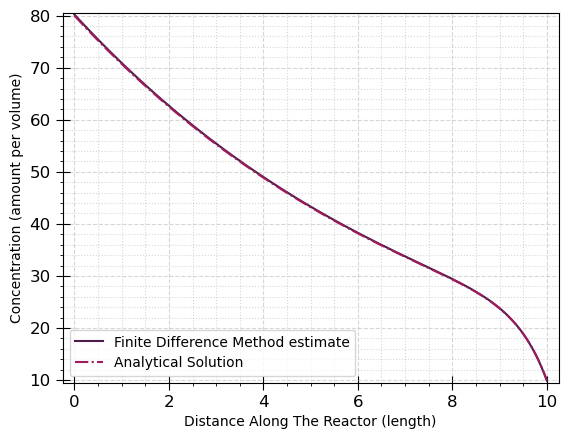

In [9]:
fig, ax = plt.subplots()
colors=sns.color_palette("rocket",4)
ax.plot(xrange,c,color=colors[0],linestyle='-',label='Finite Difference Method estimate')
ax.plot(xrange,cAnalytical,color=colors[1],linestyle='-.',label='Analytical Solution')

ax.set_ylabel("Concentration (amount per volume)")
ax.set_xlabel("Distance Along The Reactor (length)")

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

ax.set_ylim(9.5,80.5)
ax.set_xlim(-0.25,10.25)

plt.tick_params(direction='inout', length=10, labelsize=12)
plt.legend(loc='lower left')
plt.show()

A few notes: 
- Different delta x values were tried (see table below and solution directly above).
- I could not get a RMSE < 1% in this calculation. The lowest I could get was 12.7% with a delta x of 0.003. Beyond this, the calculations just took too long and my computer wouldn't return an RMSE value within any reasonable time frame...

In [10]:
# define the headers for the table, add in | to separate the columns, and generate the full, center-aligned header
headers = ['  Δx ',' Condition # ',' RMSE (%) ']
aligned_headers = "|"
for header in headers: aligned_headers += f' {header: ^} |'

# add a line of --- characters to separate the headers from the table values

dividers = ""
for char in range(len(aligned_headers)): dividers += "-"

# print the dividers and headers
print(dividers + "\n" + aligned_headers + "\n" + dividers)

deltaxRange = np.arange(0.003,0.12,0.001)
# print(deltaxRange)

for deltax in deltaxRange:
    xrange, c, cAnalytical, conditionNum, rmse = solver(deltax)
    print(f'| {deltax: ^{len(headers[0])}.3f} | {conditionNum: ^{len(headers[1])}.3f} | {rmse*100: ^{len(headers[2])}.3f} |')

--------------------------------------
|   Δx  |  Condition #  |  RMSE (%)  |
--------------------------------------
| 0.003 |  1026623.142  |   12.721   |
| 0.004 |  577432.099   |   16.730   |
| 0.005 |  369500.855   |   20.905   |
| 0.006 |  256481.518   |   25.758   |
| 0.007 |  188407.017   |   29.927   |
| 0.008 |  144271.102   |   33.412   |
| 0.009 |  113966.211   |   37.744   |
| 0.010 |   92305.750   |   41.735   |
| 0.011 |   76268.508   |   46.061   |
| 0.012 |   64062.538   |   50.726   |
| 0.013 |   54581.781   |   54.705   |
| 0.014 |   47052.234   |   59.023   |
| 0.015 |   40962.908   |   64.199   |
| 0.016 |   36024.514   |   66.626   |
| 0.017 |   31896.525   |   71.445   |
| 0.018 |   28433.685   |   76.611   |
| 0.019 |   25523.378   |   80.053   |
| 0.020 |   23041.919   |   83.154   |
| 0.021 |   20890.230   |   87.961   |
| 0.022 |   19019.854   |   93.459   |
| 0.023 |   17391.355   |   98.617   |
| 0.024 |   15972.325   |  102.382   |
| 0.025 |   14735.864   |

**HW 4-2**: The first order reaction $A\rightarrow B$ takes place in two
  reactors in series. The reactors are well-mixed. The transient mass
  balances gives the system of differential equations:

\begin{eqnarray*}
\frac{dC_{A1}}{dt} &=& \frac{1}{\tau_1} (C_{A0} - C_{A1}) - k_1 C_{A1}\\
\frac{dC_{B1}}{dt} &=& -\frac{1}{\tau_1} C_{B1} + k_1 C_{A1} \\
\frac{dC_{A2}}{dt} &=& \frac{1}{\tau_2} (C_{A1} - C_{A2}) - k_2 C_{A2} \\
\frac{dC_{B2}}{dt} &=& \frac{1}{\tau_2} (C_{B1} - C_{B2}) + k_2 C_{A2}
\end{eqnarray*}

Where $\tau_i$ is the residence time for each reactor, defined as the
reactor volume divided by the total (volumetric) flow rate, $C_{Ai}$
and $C_{Bi}$ are the concentrations in the $i$th reactor, $k_1$ and
$k_2$ are the rate constants in each reactor (which are different
because of the different conditions in each reactor) and $C_{A0}$ is
the concentration of $A$ in the flow entering the first
reactor. 

Assume $\tau_1$ = 6 min, $\tau_2$ = 4 min, $k_1$ = 0.16
min$^{-1}$, $k_2$ =0.14 min$^{-1}$, and $C_{A0}$ = 0.20 M. At
$t=0$,$C_{A1}=C_{B1}=C_{A2}=C_{B2}=0$.

Note that the above can be written in matrix form as 
\begin{eqnarray*}
\frac{d}{dt}\begin{pmatrix}C_{A1} \\ C_{B1} \\  C_{A2} \\ C_{B2} \end{pmatrix} = 
\begin{pmatrix} -\tau_1^{-1} - k_1  &               0     &  0                        &      0\\
                              k_1  &   -{\tau_1}^{-1}  &  0                        &      0\\
                 \tau_2^{-1}  &               0     &  -{\tau_2}^{-1} - k_2   &  0 \\
                            0      &     {\tau_2}^{-1} &  k_2                      & -{\tau_2}^{-1} 
\end{pmatrix} \begin{pmatrix}C_{A1} \\ C_{B1} \\  C_{A2} \\ C_{B2} \end{pmatrix} + 
\begin{pmatrix}\frac{C_{A0}}{\tau_1} \\ 0 \\  0 \\ 0 \end{pmatrix}
\end{eqnarray*}
Which can be written in the form $\frac{d\vec{X}}{dt} = A\vec{X} + \vec{B}$.

The solutions to this type of integration are of the form
\begin{eqnarray*}
X(t) = \sum_i c_i v_i e^{\lambda_i t} - A^{-1}\vec{B} 
\end{eqnarray*}
Where the $v_i$ and $\lambda_i$ are the eigenvectors and eigenvalues of the matrix $A$, and the $c_i$ are constants that depend on the initial conditions.  See the matrix notes for more tips on how to solve such problems!

To solve for the $c_i$, if we plug in $t=0$, the coefficients $c_i$ must satisfy the equation $\vec{X}(0) + A ^{-1}\vec{B} = \sum_i c_i v_i = V\vec{c}$. This is also matrix equation, with the left side being a vector, and the right side being a matrix $V$, with columns the eigenvectors, and $\vec{c}$ the vector of constants. Solving this matrix equation gives the $c_i$, which can be checked that they satisfy the initial conditions. 


a) Generate the analytical solutions for the transient concentrations. Graph and explain the results. Use numpy/Python to perform any linear algebra, calculations of eigenvalues, and solutions of initial value conditions.

Rearranging:
<center>

\begin{eqnarray*}
\overrightarrow{X}(0) + A^{-1}\overrightarrow{B} = V\overrightarrow{c} \\
V^{-1}(\overrightarrow{X}(0) + A^{-1}\overrightarrow{B}) =  \overrightarrow{c}
\end{eqnarray*}

</center>

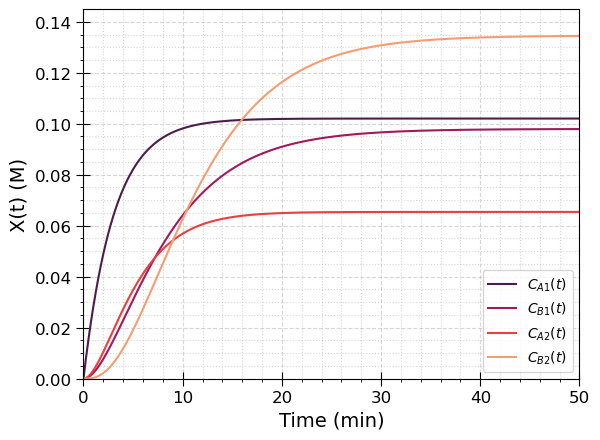

In [11]:
tau1 = 6    # min
tau2 = 4    # min
k1 = 0.16   # 1/min
k2 = 0.14   # 1/min
CA0 = 0.20  # M

CA1_0 = 0   # M
CA2_0 = 0   # M
CB1_0 = 0   # M
CB2_0 = 0   # M

A = np.array([[ ((-1/tau1)-k1), 0, 0, 0], [k1, (-1/tau1), 0, 0], [(1/tau2), 0, ((-1/tau2)-k2), 0], [0, (1/tau2), k2, (-1/tau2)]])
A_inv = np.linalg.inv(A)
B = np.array([CA0/tau1,0,0,0])

eigenvalues_A, eigenvectors_A = np.linalg.eig(A) # calculates the eigenvalues and eigenvectors of the matrix A

X0 = np.array([CA1_0, CB1_0, CA2_0, CB2_0])

t = np.linspace(0, 50, 1000)

c = np.dot(np.linalg.inv(eigenvectors_A), X0 + np.dot(A_inv, B)) # calculates the coefficient vector c (see above)

# was getting weird ValueErrors when I first constructed this code so used ChatGPT to generate g, y, and this for loop to get the final solution

g = np.dot(np.linalg.inv(A), B)  # steady-state solution
X = np.zeros([4, 1000])          # 4 by 1000 b/c there are 4 eigenvectors / eigenvalues and 1000 time data points!
                                 # need this to calculate X(t) solution w/o getting errors b/c eigenvector dimensions don't match eigenvalues dimensions
                                 # this stores CA1, CB1, CA2, and CB2 at all time points
for i in range(4):
    for j in range(4):
        X[i] += c[j] * eigenvectors_A[i, j] * np.exp(eigenvalues_A[j] * t)
    X[i] -= g[i]

# plotting the solution(s)

fig, ax = plt.subplots()

colors=sns.color_palette("rocket",4)
labels = ['$C_{A1}(t)$', '$C_{B1}(t)$', '$C_{A2}(t)$', '$C_{B2}(t)$']

for i in range(4):
    ax.plot(t, X[i], color=colors[i], label=labels[i])

ax.set_xlabel('Time (min)', fontsize=14)
ax.set_ylabel('X(t) (M)', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)
plt.tick_params(direction='inout', length=10, labelsize=12)

ax.set_xlim(0, 50)
ax.set_ylim(0, 0.145)

plt.legend(loc='lower right')
plt.show()

\begin{eqnarray*}
X(t) = \sum_i c_i v_i e^{\lambda_i t} - A^{-1}\vec{B} 
\end{eqnarray*}

Directly above you can see the analytical solution to the series of differnetial equations arising from a transient mass balance on the two reactors in series. Both species concentraitons in both reactors reach a steady state equilibrium value by around 40 minutes. The species which takes the longest to reach it's steady state value is CB2, likely due to the fact that it has to be produced via rxn and it's in the second reactor so that'll take longer. Contrastingly, CA1 is the species which takes the shortest amount of time to reach its steady state value. Beyond that, there's nothing out of the "ordinary" or particularly "interesting" to note!

b) Solve the differential equation using `scipy.integrate.solve_ivp` with several integration methods and compare to the analytical solution. Report any differences between methods that seem interesting (hint - they should just be numerical differences - both methods should work!). See what you need to do get smooth output curves for the analytical methods.

- RUN WITH SEVERAL INTEGRATION METHODS - SEE HW4 CODE TO DO THIS IN A LOOP
- COMPARE ANALYTICAL SOLUTIONS B/W INTEGRATION METHODS
- REPORT INTERESTING DIFFERENCES BETWEEN METHODS - SHOULD BE NUMERICAL
- WHAT DO YOU NEED TO DO TO GET SMOOTH OUTPUT CURVES: DEFINE T_EVAL !

In [12]:
def f(t, y):
    """ This solves a system of differential equations resulting from a transient mass
  balance on the system of 2 reactors in HW5 problem 2. 

    Args:
        t: a 1 x n time vector
        y: a n x 4 concentration vector of CA1, CB1, CA2, and CB2

    Returns:
        dydt: a n x 4 vector of the rate of change in concentration of A in reactor 1, B in reactor 1, A in reactor 2, and B in reactor 2.
    """
    tau1 = 6    # min
    tau2 = 4    # min
    k1 = 0.16   # 1/min
    k2 = 0.14   # 1/min
    CA0 = 0.20  # M

    dydt = np.zeros(4)

    # y[0] = CA1
    # y[1] = CB1
    # y[2] = CA2
    # y[3] = CB2
 
    dydt[0] = (1/tau1) * (CA0 - y[0]) - (k1 * y[0])     # dCA1/dt
    dydt[1] =  (-1/tau1) * y[1] + (k1 * y[0])           # dCB1/dt
    dydt[2] =  (1/tau2) * (y[0] - y[2]) - (k2 * y[2]) # dCA2/dt
    dydt[3] =  (1/tau2) * (y[1] - y[3]) + (k1 * y[2])   # dCB2/dt
    
    return dydt

In [13]:
trange = [0, 50]
y_init = [CA1_0, CB1_0, CA2_0, CB2_0]

t_eval=np.linspace(trange[0], trange[-1], 1000)

# sol = solve_ivp(f, trange, y_init, method='RK45', rtol=10**-8)
sol = solve_ivp(f, trange, y_init, method='RK45', rtol=10**-8, t_eval=t_eval)

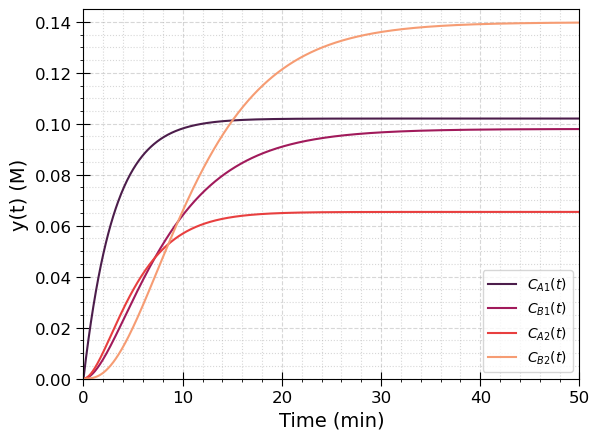

In [14]:
fig, ax = plt.subplots()
colors=sns.color_palette("rocket",4)

ax.plot(sol.t, sol.y[0], color=colors[0], label='$C_{A1}(t)$')
ax.plot(sol.t, sol.y[1], color=colors[1], label='$C_{B1}(t)$')
ax.plot(sol.t, sol.y[2], color=colors[2], label='$C_{A2}(t)$')
ax.plot(sol.t, sol.y[3], color=colors[3], label='$C_{B2}(t)$')

ax.set_xlabel('Time (min)', fontsize=14)
ax.set_ylabel('y(t) (M)', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)


ax.set_xlim(0, 50)
ax.set_ylim(0, 0.145)

plt.legend(loc='lower right')
plt.show()

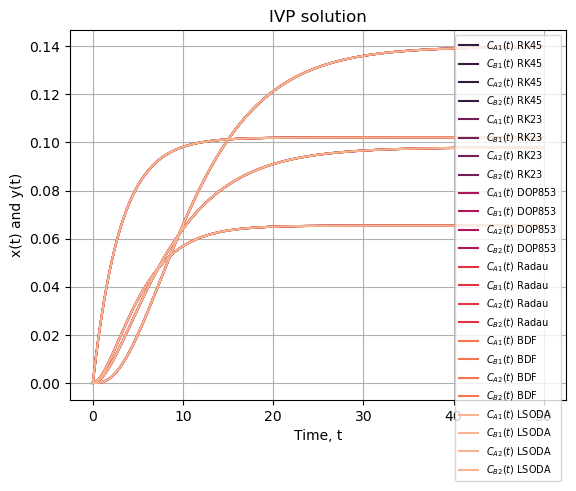

In [15]:
methods = ['RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA']

solutions = {}

for method in methods:
    
    sol = solve_ivp(f, trange, y_init, method=method, rtol=10**-8, t_eval=t_eval)    
    solutions[method] = sol

sns.reset_defaults()
fig, ax = plt.subplots()

colors = sns.color_palette("rocket", len(methods))
# colorsB1 = sns.color_palette("rocket", 2*len(methods))
# colorsA2 = sns.color_palette("rocket", 3*len(methods))
# colorsB2 = sns.color_palette("rocket", 4*len(methods))

# print(solutions)

# used ChatGPT to help me re-write my loop from HW4 to work with this solution
for method, color in zip(methods, colors):
    i = 1
    sol = solutions[method]
    ax.plot(sol.t, sol.y[0], color=color, label='$C_{{A1}}(t)$ ' + method)
    ax.plot(sol.t, sol.y[1], color=color, label='$C_{{B1}}(t)$ ' + method)
    ax.plot(sol.t, sol.y[2], color=color, label='$C_{{A2}}(t)$ ' + method)
    ax.plot(sol.t, sol.y[3], color=color, label='$C_{{B2}}(t)$ ' + method)
    i += 1
    
plt.xlabel('Time, t')
plt.ylabel('x(t) and y(t)')
plt.title('IVP solution')
plt.legend(fontsize=7)
plt.grid(True)
plt.show()

- As you can see in the past few graphs, both numerical and analytical solution methods work and agree to a degree that is indistinguishable to my eye. Moreover, all different numerical integration methods agree to a degree that is indistinguishable to my eye. 

c) Solve numerically except that instead of a constant $C_{A0} = 0.2M$, $C_{A0}$ is time-dependent, alternating with 10 minutes at 0.2M on (starting at t = 0) and 5 minutes off, repeating indefinitely. 

In [16]:
def CA0_t(t):
    if (t % 15) < 10:
        return 0.2
    else:
        return 0.0

def f_CA0var(t, y):
    """ This solves a system of differential equations resulting from a transient mass
  balance on the system of 2 reactors in HW5 problem 2. 

    Args:
        t: a 1 x n time vector
        y: a n x 4 concentration vector of CA1, CB1, CA2, and CB2

    Returns:
        dydt: a n x 4 vector of the rate of change in concentration of A in reactor 1, B in reactor 1, A in reactor 2, and B in reactor 2.
    """
    tau1 = 6    # min
    tau2 = 4    # min
    k1 = 0.16   # 1/min
    k2 = 0.14   # 1/min
    
    CA0 = CA0_t(t)  # M

    dydt = np.zeros(4)

    # y[0] = CA1
    # y[1] = CB1
    # y[2] = CA2
    # y[3] = CB2
 
    dydt[0] = (1/tau1) * (CA0 - y[0]) - (k1 * y[0])     # dCA1/dt
    dydt[1] =  (-1/tau1) * y[1] + (k1 * y[0])           # dCB1/dt
    dydt[2] =  (1/tau2) * (y[0] - y[2]) - (k2 * y[2]) # dCA2/dt
    dydt[3] =  (1/tau2) * (y[1] - y[3]) + (k1 * y[2])   # dCB2/dt
    
    return dydt

In [17]:
trange = [0, 30]
y_init = [CA1_0, CB1_0, CA2_0, CB2_0]

t_eval=np.linspace(trange[0], trange[-1], 100)

# sol = solve_ivp(f, trange, y_init, method='RK45', rtol=10**-8)
sol = solve_ivp(f_CA0var, trange, y_init, method='RK45', rtol=10**-8, t_eval=t_eval)

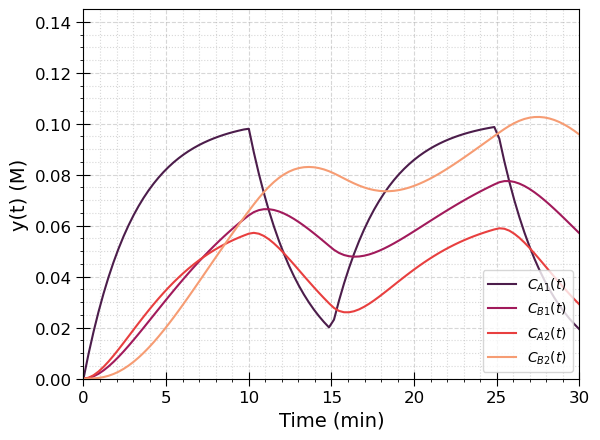

In [18]:
fig, ax = plt.subplots()
colors=sns.color_palette("rocket",4)

ax.plot(sol.t, sol.y[0], color=colors[0], label='$C_{A1}(t)$')
ax.plot(sol.t, sol.y[1], color=colors[1], label='$C_{B1}(t)$')
ax.plot(sol.t, sol.y[2], color=colors[2], label='$C_{A2}(t)$')
ax.plot(sol.t, sol.y[3], color=colors[3], label='$C_{B2}(t)$')

ax.set_xlabel('Time (min)', fontsize=14)
ax.set_ylabel('y(t) (M)', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)


ax.set_xlim(0, 30)
ax.set_ylim(0, 0.145)

plt.legend(loc='lower right')
plt.show()

**HW 4-3:** Solve problem 4-1 as a boundary value problem, using `solve_bvp`. Show the solutions match (up to the level of agreement you expect).

Δx = 0.005
Condition number: 369500.855
RMSE (Root Mean Square Error) is 20.905%


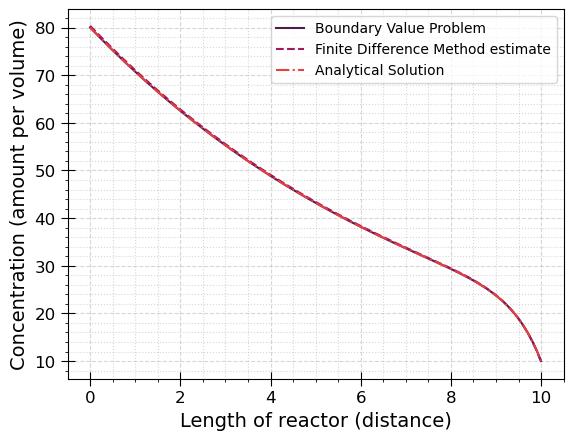

In [19]:
def solver(deltax):
    """ This creates a matrix A which represents the linear system of equations which arise when using the Finite Difference Method

    Args:
        n: number of intervals 
        deltax: differential change in x for the approximation

    Returns:
        A tridiagonal matrix A matrix A which represents the linear system of equations that arise when using the Finite Difference Method
    """
    
    D = 1    # no dimensions / units given
    U = 1.5  # no dimensions / units given
    k = 0.2  # no dimensions / units given
    c0 = 80  # no units given
    cf = 10  # no units given
    xf = 10  # no units given, =10 b/c that's the right boundary

    nSteps = int(xf/deltax)+1          # converting to int, adding +1 ensures that both endpoints are included in xrange
    xrange = np.linspace(0,xf,nSteps)  # determine range of x values based on reactor length and number of intervals
    A = np.zeros((nSteps,nSteps))      # coefficient matrix of the linear system Ax = b

    for i in range(nSteps):
        A[i,i] = -2*D/(deltax**2) - k                           # coefficient of the c(x-deltax) term
        if i > 0: A[i,i-1] = D/(deltax**2) + U/2/deltax         # coefficient of the the c(x) term
        if i < nSteps-1: A[i,i+1] = D/(deltax**2) - U/2/deltax  # coefficient of the c(x+deltax) term

    # define the boundary conditions of A
    A[0,0] = 1    # see book reference; upper-left diagonal of coeff matrix = 1 so that y(0) = j (where j is your intial condition)
    A[-1,-1] = 1  # see book reference; bottom-right diagonal of coeff matrix = 1 so that y(n) = k (where k is your right bound)
        
    b = np.zeros(nSteps)    # creates the solution matrix (b in the linear system Ax=b)
    b[0] = c0/(deltax**2)   # initial condition (left bound), estimate breaks if not divided by deltax**2??? ***
    b[-1] = cf/(deltax**2)  # right bound, estimate breaks if not divided by deltax**2??? ***

    c = np.linalg.solve(A, b)

    # derived above
    # cAnalytical = 80.00000011897*np.exp(-0.12321245982865*xrange)-0.0000011897*np.exp(1.62321*xrange)
    cAnalytical = C1*np.exp(r1*xrange) + C2*np.exp(r2*xrange)

    # finding the error b/w analytical solution and finite difference approximation solution (want this to be less than 1%, or 0.01)
    mse = np.mean((c-cAnalytical)**2)
    rmse = np.sqrt(mse)
    
    # condition number calculation
    conditionNum = np.linalg.cond(A)
    
    return xrange, c, cAnalytical, conditionNum, rmse

deltax = 0.005
xrange, c, cAnalytical, conditionNum, rmse = solver(deltax)

print(f'Δx = {deltax:.3f}')
print(f'Condition number: {conditionNum:.3f}')
print(f"RMSE (Root Mean Square Error) is {rmse*100:.3f}%")

# D, U, k, c0, x0, cf, and xf are all still defined from above

def fun(x,c): # annoyingly, solve_bvp does not take args
    ''' derivative function'''

    # c[0] = c(x)
    # c[1] = dc/dx
    
    der = np.zeros(np.shape(c))
    der[0] = c[1]               # first derivative = dc/dx    
    der[1] = (k*c[0]+U*c[1])/D  # second derivative (solve diffeq for d2c/dx2)
    return der

def bc(ca,cb):
    ''' Boundary condition function'''
    c0 = 80
    cf = 10
    
    return np.array([ca[0]-c0,cb[0]-cf])

Nsolve = 41
xgrid = np.linspace(0,xf,Nsolve)
ygrid = np.array([np.linspace(c0,cf,Nsolve),np.zeros(Nsolve)])
results = solve_bvp(fun, bc, xgrid, ygrid, tol=10**-6)

xrange, c, cAnalytical, conditionNum, rmse = solver(deltax)
cAnalytical = C1*np.exp(r1*xrange) + C2*np.exp(r2*xrange)

Nplot = 161
xvals = np.linspace(0,xf,Nplot)

fig, ax = plt.subplots()
colors=sns.color_palette("rocket",4)


ax.plot(xvals,results.sol(xvals)[0],color=colors[0],label = 'Boundary Value Problem')        # BVP solution
ax.plot(xrange,c,color=colors[1],linestyle='--',label='Finite Difference Method estimate')
ax.plot(xrange,cAnalytical,color=colors[2],linestyle='-.',label='Analytical Solution')
ax.set_xlabel('Length of reactor (distance)',fontsize=14)
ax.set_ylabel('Concentration (amount per volume)',fontsize=14)

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

plt.tick_params(direction='inout', length=10, labelsize=12)

plt.legend(loc='upper right')
plt.show()

**HW 4-4:**  Continue to play around Python, especially `scipy`, to test out a range of functionality that wasn’t covered in class.

Write in a Markdown cell a couple of paragraphs about what you did, and give some examples of code cells below with the cool things you found.

For this homework's Python exploration problem, I completed this [SciPy tutorial](https://www.edureka.co/blog/scipy-tutorial/), which covers what the SciP library does and how it can be used.
- SciPy is an open-source Python library which can be used to solve both scientific and mathematical problems. 
- SciPy is built on NumPy - if you import SciPy then there is no need to import NumPy. 
- Both NumPy and SciPy are used for mathematical and numerical analysis.
- SciPy has a number of subpackages which can be useful for scientific computations. A few I found to be interesting and probably relevant include: `constants` (physical and mathematical constants), `integrate` (integration and ordinary differential equation solvers), `interpolate` (interpolation and smoothing splines), `linalg` (linear algebra), `special` (special functions), and `stats` (statistical distributions and functions). These packages need to be imported exclusively prior to use in code (e.g., `from scipy import special`).

In [20]:
from scipy import special

In [21]:
# help(special)

In [22]:
# scipy.info(special)

In [23]:
from scipy import special

a = special.exp10(3)
b = special.exp2(3)
c = special.sindg(90)
d = special.cosdg(45)

print(a)
print(b)
print(c)
print(d)

1000.0
8.0
1.0
0.7071067811865475


As we've explored in class, the `quad()` function can be used to calculate the integral of a function which has one interval. The syntax of this function is `quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)`. An interesting thing I learned here is that you can have the limits be +/- `inf` to indicate infinite integral limits.

In [24]:
from scipy import special
from scipy import integrate
a = lambda x: special.exp10(x)
b = scipy.integrate.quad(a, 0, 1)
print(b)

(3.9086503371292665, 4.3394735994897923e-14)


SciPy's `dblquad()` function can be used to calculate double integrals. This function takes the functiont o be interated as its parameter and 4 variables which define the limits and the functions dy and dx.

from scipy import integrate

In [25]:
from scipy import integrate
a = lambda y, x: x*y**2
b = lambda x: 1
c = lambda x: -1
integrate.dblquad(a, 0, 2, b, c)

(-1.3333333333333335, 1.4802973661668755e-14)

SciPy also haas linear algebra capabilities! This tutorial says that this is good to know since use of numpy.linalg without ATLAS LAPACK and BLAS support will be slower than scipy.linalg.

In [26]:
import numpy as np
from scipy import linalg
A = np.array([[1,2], [4,3]])
B = linalg.inv(A)
print(B)

[[-0.6  0.4]
 [ 0.8 -0.2]]


In [27]:
A = np.array([[1,2], [4,3]])
B = linalg.det(A)
print(B)

-5.0


In [28]:
from scipy.linalg import eigh
A = np.array([[1, 2, 3, 4], [4, 3, 2, 1], [1, 4, 6, 3], [2, 3, 2, 5]])
a, b = eigh(A)
print("Selected eigenvalues :", a)
print("Complex ndarray :", b)

Selected eigenvalues : [-2.53382695  1.66735639  3.69488657 12.17158399]
Complex ndarray : [[ 0.69205614 -0.5829305   0.25682823 -0.33954321]
 [-0.68277875 -0.46838936  0.03700454 -0.5595134 ]
 [ 0.23275694  0.29164622 -0.72710245 -0.57627139]
 [ 0.02637572  0.59644441  0.63560361 -0.48945525]]


At this point I had completed the tutorial! There were some other examples which I did not include here because there were bugs in the code they provided...

I did want to note that I did this portion of the assignment (the scipy tutoria) BEFORE starting the other portions of the homework - there is overlap between what I covered here and what I did in the assignment. But nevertheless this was a helpful tutorial to go through before I started the assignment and helped me with understanding scipy's capabilities!